# Temporal Difference On Policy SARSA

In [3]:

# import 
import gym 
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import *

In [2]:
# create environment
env = Maze()
env.reset()

(0, 0)

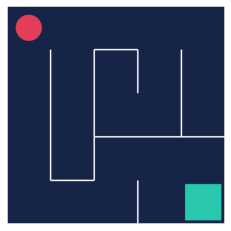

In [4]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)


In [20]:
# create q table (action values)
state_size = env.observation_space.nvec
action_size = env.action_space.n

action_values = np.zeros(shape=(state_size[0], state_size[1], action_size))

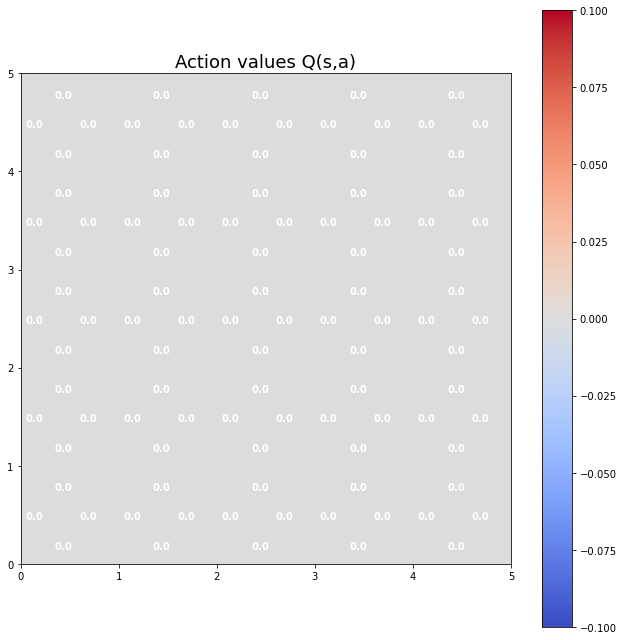

In [21]:
# plot action values
plot_action_values(action_values)

In [22]:
# define policy
def policy(state, epsilon=.3):
    # explore 
    if np.random.random() < epsilon: return np.random.choice(4)
    # exploit
    else: 
        action = action_values[state]
        return np.random.choice(np.flatnonzero(action == action.max()))

In [23]:
# implement algorithm
def sarsa(action_values, policy, episodes, learning_rate=.2, discount_rate=.9, epsilon=.3):
    
    for esp in range(1, episodes+1):
        state = env.reset()
        action = policy(state, epsilon=epsilon)
        done = False
    
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon=epsilon)
            
            old_qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            
            action_values[state][action] = old_qsa + learning_rate * (reward + discount_rate * next_qsa - old_qsa)
            
            state = next_state
            action = next_action

In [27]:
sarsa(action_values, policy, 5000)

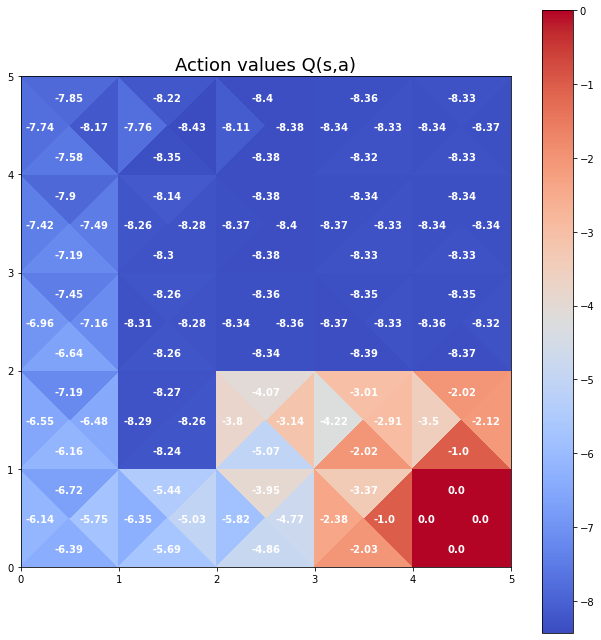

In [28]:
plot_action_values(action_values)

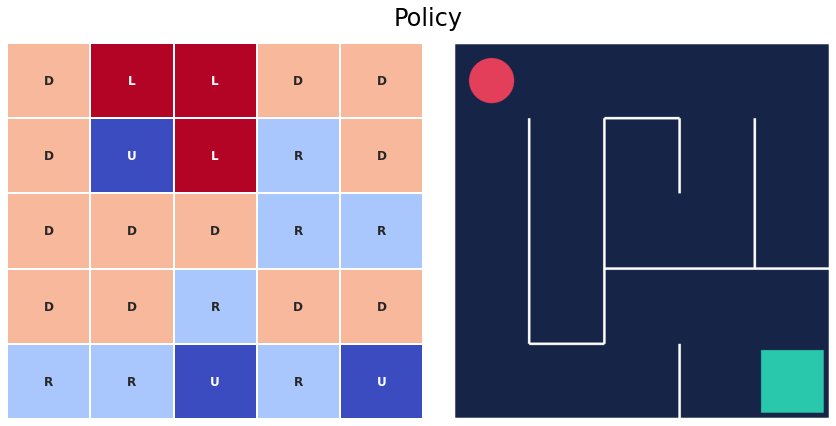

In [29]:
# plot optimal policy
plot_policy(action_values, frame)

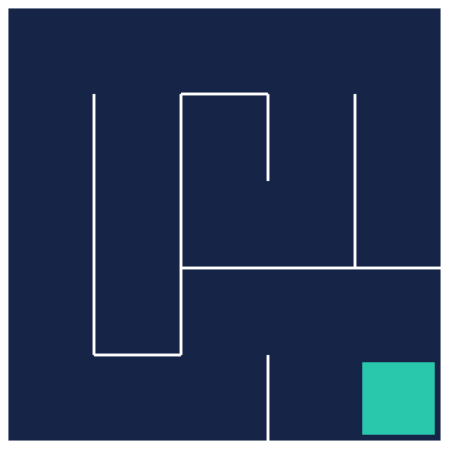

In [26]:

test_agent(env, policy, episodes=1)